In [1]:
import pandas as pd
import numpy as np

In [2]:
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True, 
                     infer_datetime_format=True)

weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True, 
                      infer_datetime_format=True)

In [3]:
#weather.replace(-9999,np.nan,inplace=True)

In [4]:
weather.isna().sum()

STATION         0
STATION_NAME    0
PRCP            0
SNWD            0
SNOW            0
TMAX            0
TMIN            0
AWND            0
WDF2            0
WDF5            0
WSF2            0
WSF5            0
FMTM            0
WT14            0
WT01            0
WT17            0
WT05            0
WT02            0
WT22            0
WT04            0
WT13            0
WT16            0
WT08            0
WT18            0
WT03            0
dtype: int64

In [5]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

weather_columns = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WDF2','WSF2']
daily = daily.join(weather[weather_columns], how='inner')

In [7]:
daily.to_csv("daily.csv")

In [8]:
daily.head()

,Total,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WSF2
2012-10-03,3521.0,0,0,0,189,78,73,10,103
2012-10-04,3475.0,0,0,0,189,83,65,20,94
2012-10-05,3148.0,0,0,0,217,89,57,360,80
2012-10-06,2006.0,0,0,0,239,78,51,20,76
2012-10-07,2142.0,0,0,0,239,78,13,30,54


In [7]:
daily.isna().sum()

Total    0
PRCP     0
SNOW     0
SNWD     0
TMAX     0
TMIN     0
AWND     0
WDF2     0
WSF2     0
dtype: int64

## Handling Missing Data

In [8]:
from utils import na_report

In [9]:
na_report(daily)

NA's in the DataFrame
Total    0
PRCP     0
SNOW     0
SNWD     0
TMAX     0
TMIN     0
AWND     0
WDF2     0
WSF2     0
dtype: int64


In [10]:
from utils import skew_report
skew_report(daily)

There are 5 highly skewed data columns. Please check them for miscoded na's
['SNOW', 'SNWD', 'AWND', 'WDF2', 'WSF2']


In [11]:
[i[0] for i in zip(daily.columns.values,abs(daily.skew(numeric_only=True))) if i[1] > 5]

['SNOW', 'SNWD', 'AWND', 'WDF2', 'WSF2']

In [12]:
#!pipenv install matplotlib seaborn --dev

In [13]:
#!pipenv uninstall matplotlib-pyplot

In [14]:
daily.describe()

,Total,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WSF2
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,2633.284774,29.323308,-37.461466,0.098684,166.884398,84.466165,22.386278,166.697368,61.988722
std,1252.570814,65.788243,612.225489,2.568834,74.747633,50.892438,307.843310,328.684599,309.812421
min,98.000000,0.000000,-9999.000000,0.000000,-16.000000,-71.000000,-9999.000000,-9999.000000,-9999.000000
25%,1807.500000,0.000000,0.000000,0.000000,111.000000,44.000000,22.000000,100.000000,54.000000
50%,2439.000000,0.000000,0.000000,0.000000,153.000000,83.000000,29.000000,200.000000,67.000000
75%,3568.250000,25.750000,0.000000,0.000000,222.000000,128.000000,40.000000,230.000000,89.000000
max,6088.000000,559.000000,74.000000,80.000000,356.000000,183.000000,95.000000,360.000000,192.000000


In [15]:
#!pipenv install pandas-profiling --dev
#import pandas_profiling

In [16]:
#pandas_profiling.ProfileReport(daily)

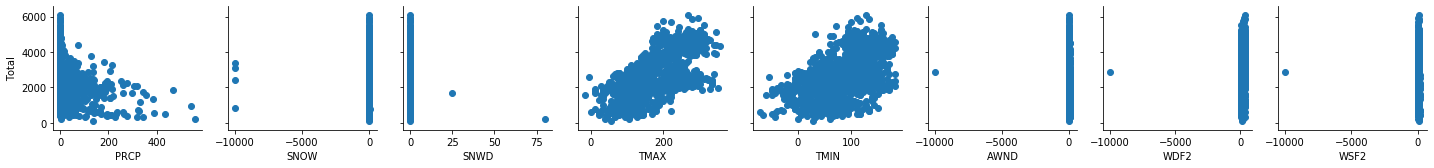

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
features=["PRCP","SNOW","SNWD","TMAX","TMIN","AWND","WDF2","WSF2"]
sns.PairGrid(daily,x_vars=features, y_vars=["Total"]).map(plt.scatter)


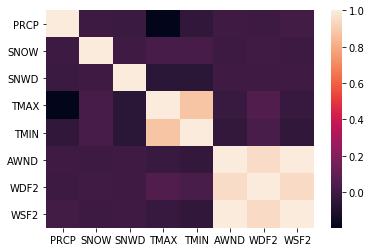

In [22]:
sns.heatmap(data=daily[features].corr())

In [19]:
daily["day_name"] = daily.index.day_name()

In [20]:
daily["month_name"] = daily.index.month_name()

In [21]:
daily.head()

,Total,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WSF2,day_name,month_name
2012-10-03,3521.0,0,0,0,189,78,73,10,103,Wednesday,October
2012-10-04,3475.0,0,0,0,189,83,65,20,94,Thursday,October
2012-10-05,3148.0,0,0,0,217,89,57,360,80,Friday,October
2012-10-06,2006.0,0,0,0,239,78,51,20,76,Saturday,October
2012-10-07,2142.0,0,0,0,239,78,13,30,54,Sunday,October


In [76]:
!pipenv install category-encoders

Installing category-encoders…
Adding category-encoders to Pipfile's [packages]…
✔ Installation Succeeded 
Pipfile.lock (2fac88) out of date, updating to (df4b5c)…
Locking [dev-packages] dependencies…
✔ Success! 
Locking [packages] dependencies…
✔ Success! 
Updated Pipfile.lock (2fac88)!
Installing dependencies from Pipfile.lock (2fac88)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 11/11 — 00:00:0222m2m22m22m22m22m22m22m22m22m2m


In [121]:
daily

,Total,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WSF2,day_name_Wednesday,...,month_name_December,month_name_January,month_name_February,month_name_March,month_name_April,month_name_May,month_name_June,month_name_July,month_name_August,month_name_September
2012-10-03,3521.0,0,0,0,189,78,73,10,103,1,...,0,0,0,0,0,0,0,0,0,0
2012-10-04,3475.0,0,0,0,189,83,65,20,94,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-05,3148.0,0,0,0,217,89,57,360,80,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-06,2006.0,0,0,0,239,78,51,20,76,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-07,2142.0,0,0,0,239,78,13,30,54,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-08,3537.0,0,0,0,211,78,19,210,40,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-09,3501.0,0,0,0,161,89,16,170,40,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-10,3235.0,0,0,0,122,83,14,40,40,1,...,0,0,0,0,0,0,0,0,0,0
2012-10-11,3047.0,0,0,0,139,72,13,270,40,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-12,2011.0,20,0,0,139,89,46,220,72,0,...,0,0,0,0,0,0,0,0,0,0


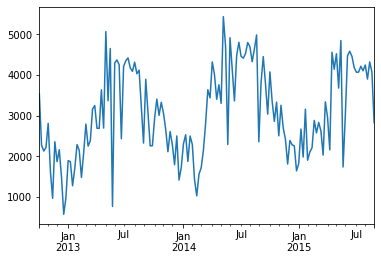

In [110]:
m = daily[daily["day_name"]=="Monday"]
m["Total"].plot()